In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
# 1. Import Data1.csv to python.
df = pd.read_csv('Data1.csv')
df.columns.values[0]="Date" # rename first column
# 2. Set first column as the index, so that df can be sliced by dates more easily
df.set_index("Date", inplace=True)
df.head()

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
Date,,,,,,
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433


In [27]:
df.tail()

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
Date,,,,,,
2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941
2019-12-30,-0.425098,-1.002701,-0.834294,0.850904,0.801977,11.140722
2019-12-31,0.848302,3.510521,-0.280626,0.967050,1.091803,11.989975


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000208974EA2C8>,
      dtype=object)

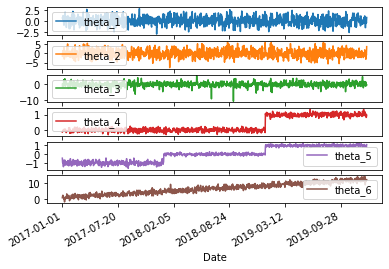

In [28]:
# 3. Plot all columns as time series. 
# Thanks to setting first column as index, we can now use it by default as the xticks.
df.plot(kind='line', subplots=True)

In [29]:
# 4. Plot histograms of all columns, verify bin size. Plot all on single faceted plot.
thetas = df.melt()
thetas

,variable,value
0,theta_1,0.756936
1,theta_1,0.767089
2,theta_1,0.404544
3,theta_1,1.313957
4,theta_1,0.209862
...,...,...
6565,theta_6,11.755980
6566,theta_6,11.397092
6567,theta_6,10.918941
6568,theta_6,11.140722


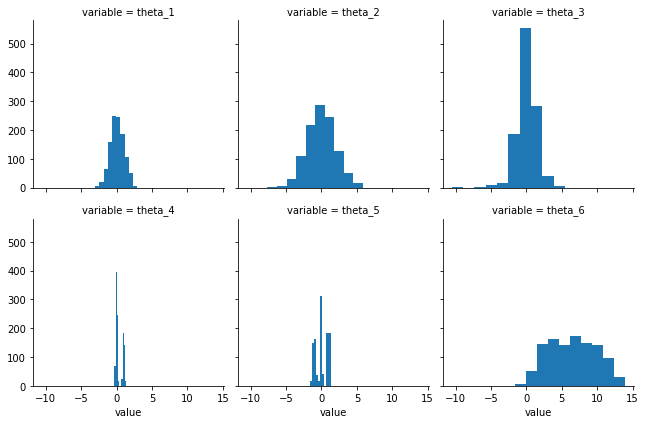

In [30]:
grid = sns.FacetGrid(thetas, col="variable", col_wrap=3)
grid.map(plt.hist, "value")

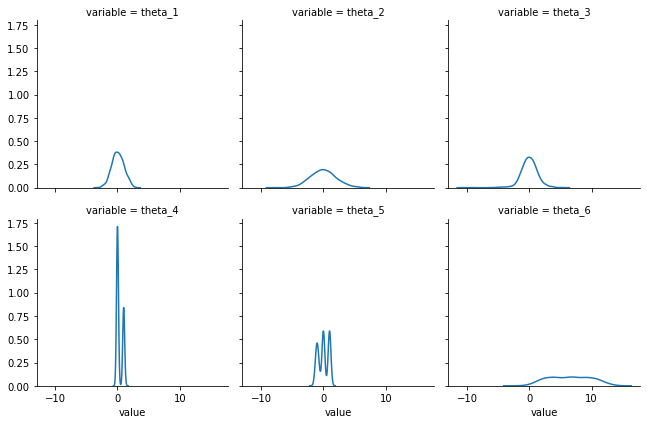

In [31]:
# 5. Plot KDE-s for all columns.
kdes = sns.FacetGrid(thetas, col="variable", col_wrap=3)
kdes.map(sns.kdeplot, "value", label="variable")

             theta_1   theta_2   theta_3   theta_4
Date                                              
2018-01-01  0.682693 -3.091767 -0.475717 -0.238530
2018-01-02 -0.283107 -0.979955  1.233933  0.158031
2018-01-03  1.572221 -2.033528  2.196317  0.041347
2018-01-04 -1.042981  0.651530  1.060125  0.064832
2018-01-05 -1.392614 -2.570905 -0.600063 -0.015025
...              ...       ...       ...       ...
2018-12-27  0.473556 -0.651265 -0.523058  0.076798
2018-12-28  1.433117  0.325632  0.905920  0.028891
2018-12-29  0.285428 -0.476290  1.082404  0.111482
2018-12-30  2.249273 -1.233575 -0.666277 -0.080878
2018-12-31  0.316409  5.673544 -0.964592 -0.150844

[365 rows x 4 columns]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002089791D408>,
      dtype=object)

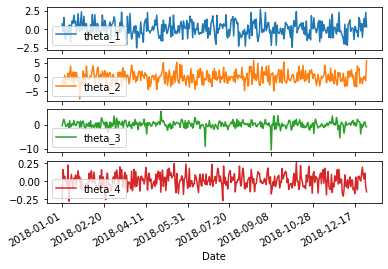

In [32]:
# 6. Repeat analysis for columns $\theta_1$-$\theta_4$ in 2018.
# Create a slice of the original dataframe
slc = df.loc['2018-01-01':'2018-12-31':1, 'theta_1':'theta_4']
print(slc)
slc.plot(subplots=True)

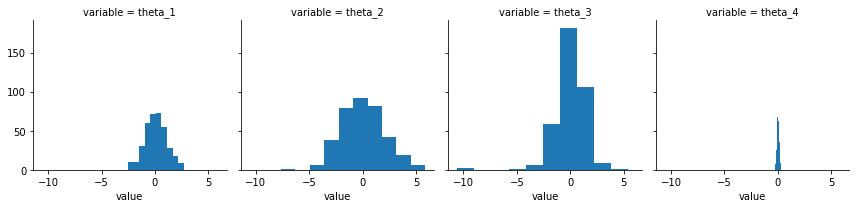

In [33]:
# Melt data and create histograms
slcm = slc.melt()
grid = sns.FacetGrid(slcm, col='variable')
grid.map(plt.hist, 'value')